In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
odi_data = pd.read_csv('odi_match_data.csv')
players_data=pd.read_csv('player_performance.csv')
players_data.head()
#odi_data.head()

,Player,Runs,Balls,Strike_Rate,Fours,Sixes,Dot_Balls
0,Rohit Sharma,85,70,121.43,10,2,25
1,Virat Kohli,45,50,90.00,4,0,30
2,Shubman Gill,60,55,109.09,6,1,20
3,KL Rahul,35,40,87.50,3,0,25
4,Hardik Pandya,70,40,175.00,4,5,10


In [6]:
print(players_data.describe())
print(odi_data.describe())

            Runs      Balls  Strike_Rate      Fours      Sixes  Dot_Balls
count  12.000000  12.000000    12.000000  12.000000  12.000000  12.000000
mean   49.583333  42.750000   120.325000   4.666667   1.250000  17.416667
std    27.090617  23.756817    24.074562   3.025147   1.356801   9.059985
min    10.000000   8.000000    87.500000   1.000000   0.000000   5.000000
25%    28.750000  23.750000   108.287500   2.750000   0.750000   9.500000
50%    50.000000  45.000000   120.715000   4.000000   1.000000  19.000000
75%    71.250000  56.250000   125.000000   6.500000   1.250000  25.000000
max    90.000000  85.000000   175.000000  10.000000   5.000000  30.000000
           Over  Team_A_Runs  Team_B_Runs  Team_A_Wickets  Team_B_Wickets
count  10.00000    10.000000    10.000000        10.00000       10.000000
mean    5.50000     7.800000     7.300000         1.90000        1.300000
std     3.02765     3.521363     2.213594         1.37032        0.948683
min     1.00000     3.000000     4.000

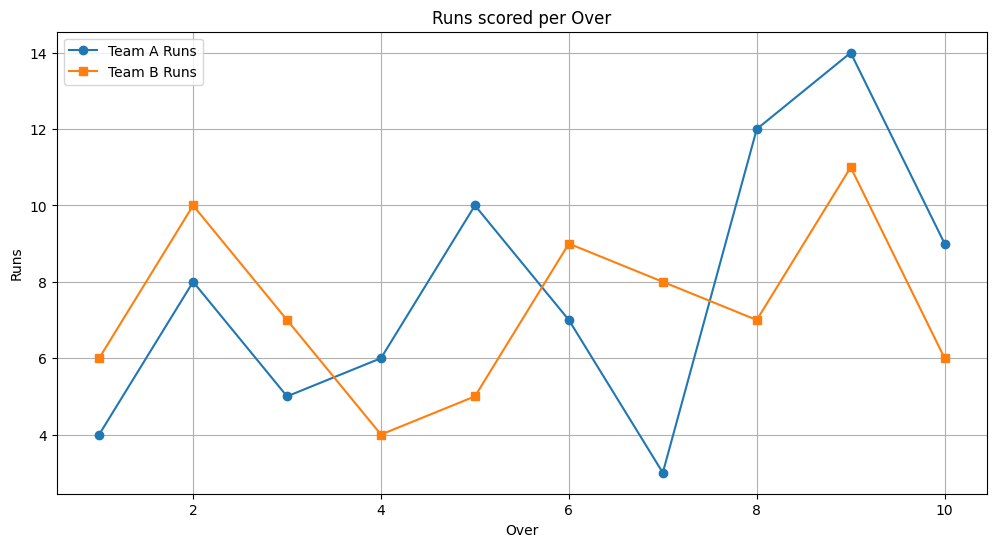

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(odi_data['Over'], odi_data['Team_A_Runs'], label='Team A Runs', marker='o')
plt.plot(odi_data['Over'], odi_data['Team_B_Runs'], label='Team B Runs', marker='s')
plt.title('Runs scored per Over')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()


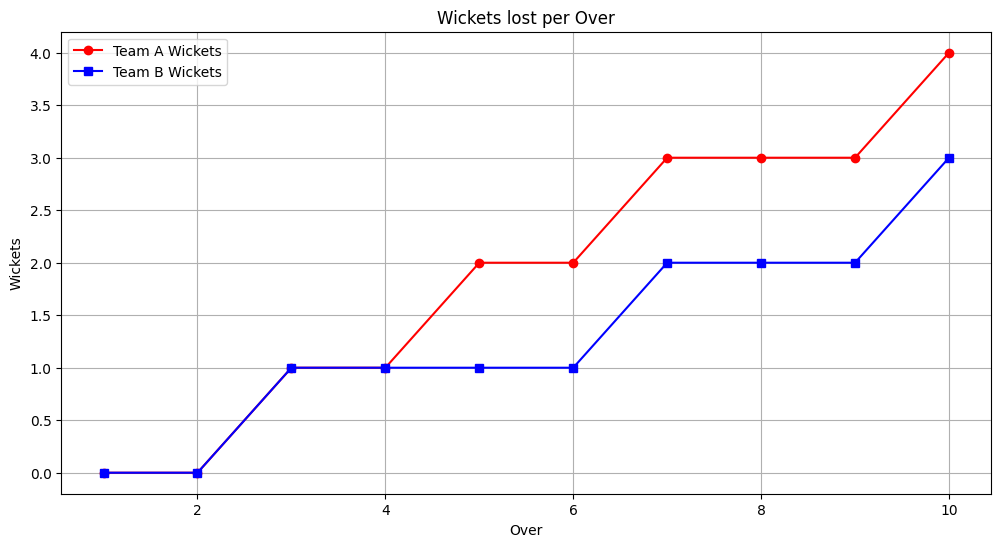

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(odi_data['Over'], odi_data['Team_A_Wickets'], label='Team A Wickets', marker='o', color='red')
plt.plot(odi_data['Over'], odi_data['Team_B_Wickets'], label='Team B Wickets', marker='s', color='blue')
plt.title('Wickets lost per Over')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.legend()
plt.grid(True)
plt.show()

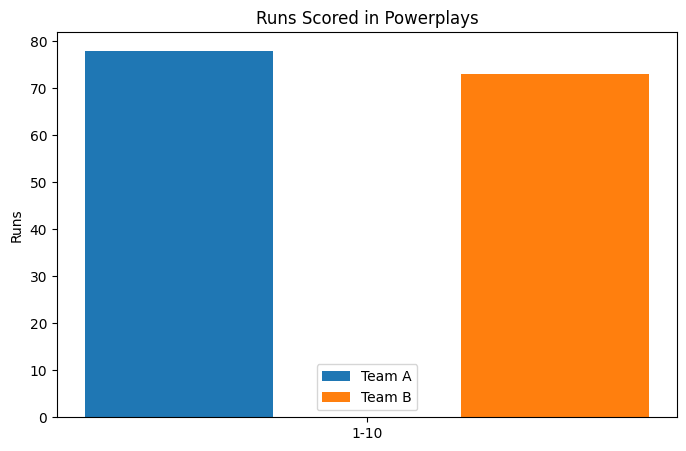

In [19]:
powerplays = ['1-10']
team_a_pp_runs = [odi_data['Team_A_Runs'][:10].sum()]
team_b_pp_runs = [odi_data['Team_B_Runs'][:10].sum()]

plt.figure(figsize=(8, 5))
x = range(len(powerplays))
plt.bar(x, team_a_pp_runs, width=0.2, label='Team A')
plt.bar([p + 0.4 for p in x], team_b_pp_runs, width=0.2, label='Team B')
plt.xticks([p + 0.2 for p in x], powerplays)
plt.ylabel('Runs')
plt.title('Runs Scored in Powerplays')
plt.legend()
plt.show()

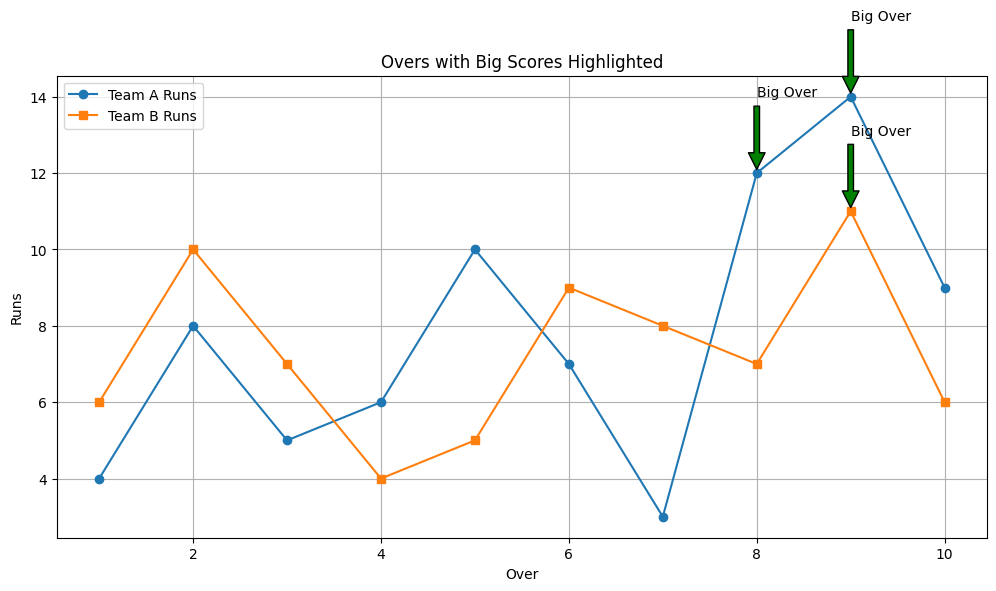

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(odi_data['Over'], odi_data['Team_A_Runs'], label='Team A Runs', marker='o')
plt.plot(odi_data['Over'], odi_data['Team_B_Runs'], label='Team B Runs', marker='s')

for idx, row in odi_data.iterrows():
    if row['Team_A_Runs'] > 10:
        plt.annotate('Big Over',
                     xy=(row['Over'], row['Team_A_Runs']),
                     xytext=(row['Over'], row['Team_A_Runs'] + 2),
                     arrowprops=dict(facecolor='green', shrink=0.05))

    if row['Team_B_Runs'] > 10:
        plt.annotate('Big Over',
                     xy=(row['Over'], row['Team_B_Runs']),
                     xytext=(row['Over'], row['Team_B_Runs'] + 2),
                     arrowprops=dict(facecolor='green', shrink=0.05))

plt.title('Overs with Big Scores Highlighted')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()

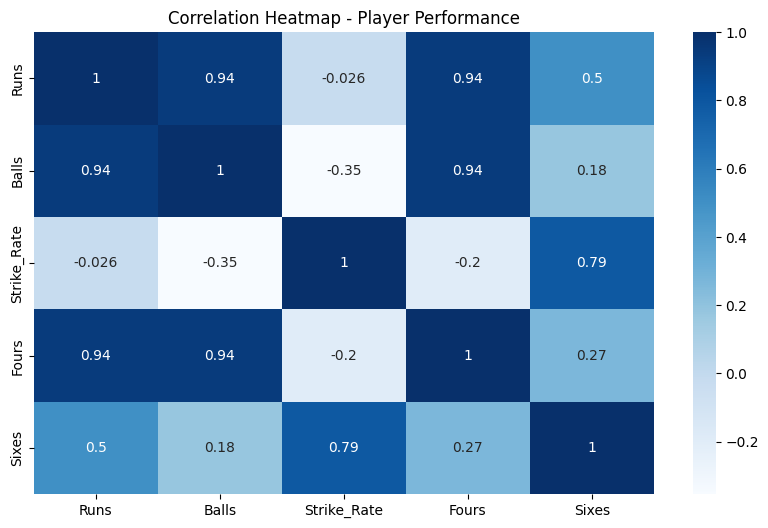

In [ ]:
plt.figure(figsize=(10, 6))
corr = players_data[['Runs', 'Balls', 'Strike_Rate', 'Fours', 'Sixes']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap - Player Performance')
plt.show()


<ipython-input-10-c12efe937c11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=players_data, x='Player', y='Runs', palette='coolwarm')


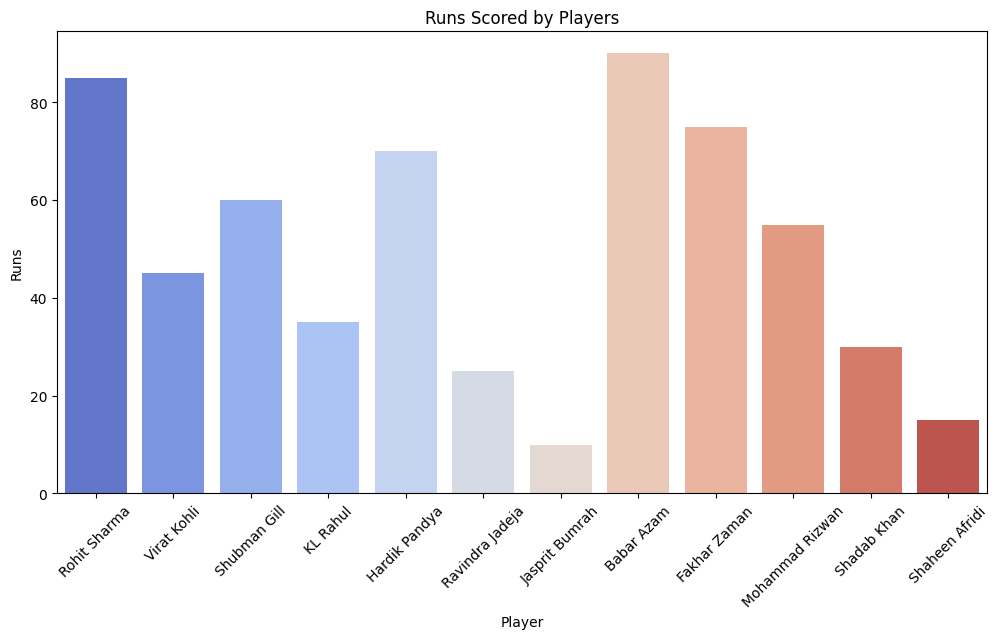

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=players_data, x='Player', y='Runs', palette='coolwarm')
plt.title('Runs Scored by Players')
plt.xticks(rotation=45)
plt.ylabel('Runs')
plt.show()

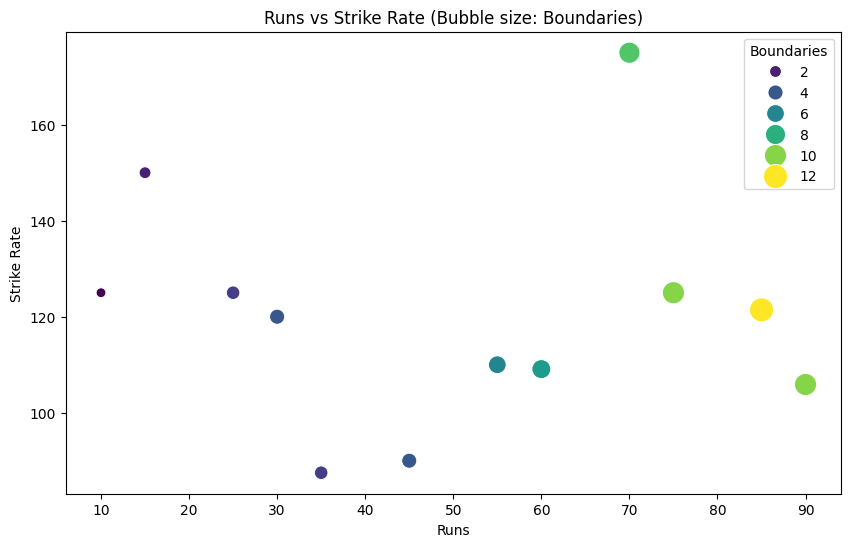

In [ ]:
plt.figure(figsize=(10, 6))
boundary_count = players_data['Fours'] + players_data['Sixes']
sns.scatterplot(data=players_data, x='Runs', y='Strike_Rate', size=boundary_count, hue=boundary_count, palette='viridis', sizes=(50, 300))
plt.title('Runs vs Strike Rate (Bubble size: Boundaries)')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.legend(title='Boundaries')
plt.show()


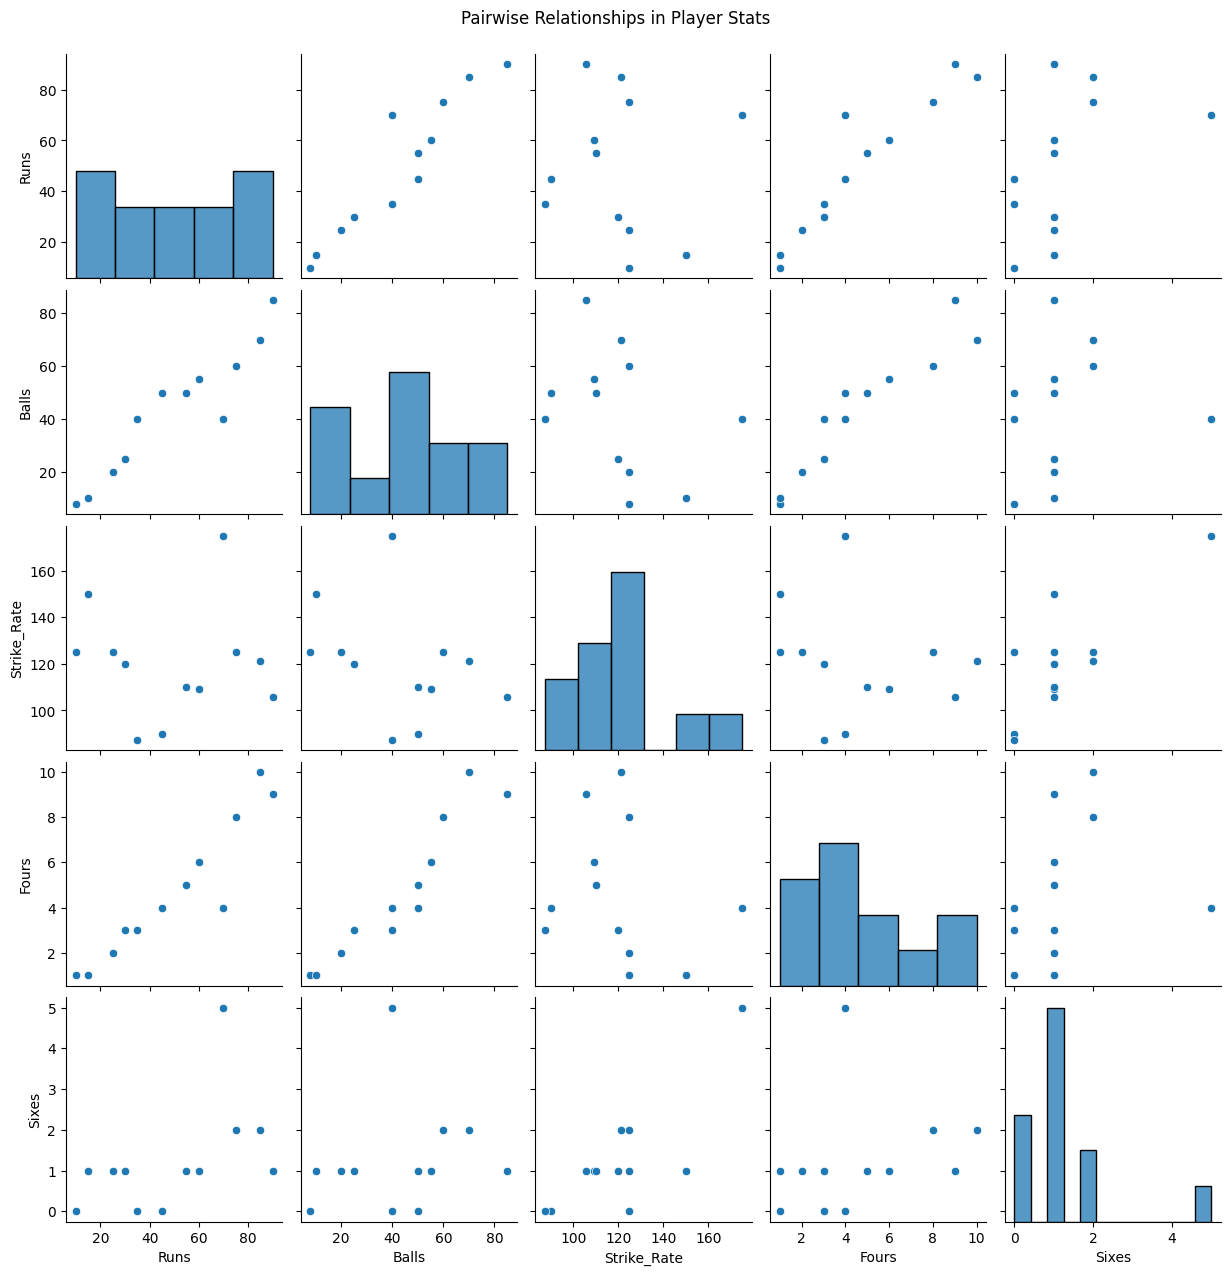

In [ ]:
sns.pairplot(players_data[['Runs', 'Balls', 'Strike_Rate', 'Fours', 'Sixes']])
plt.suptitle('Pairwise Relationships in Player Stats', y=1.02)
plt.show()
